# Task 3
Model the data by treating it as either a Classification or Clustering Task, depending on your choice.
You must use two different models (i.e. two Classification models, or two Clustering models), and when building each model, it must include the following steps:
• Select the appropriate features
• Select the appropriate model (e.g. DecisionTree for classification) from sklearn.
• If you choose to do a Classification Task,
– Train and evaluate the model appropriately.
– Trainthemodelbyselectingtheappropriatevaluesforeachparameterinthe model. You need to show how you choose this values, and justify why you choose it.
• If you choose to do a Clustering Task,
– Train the model by selecting appropriate values for each parameter in the
model.
∗ Show how do you choose this value, and justify why you choose it (for
example, k in the k-means model).
– Determine the optimal number of clusters, and justify – Evaluate the
performance of the clustering model by:
∗ Checking the clustering results against the true observation labels
∗ Constructing a “confusion matrix” to analyse the meaning of each cluster by looking at the majority of observations in the cluster. (You can do this by using a pen and a piece of paper, as we did in Practical Exercise; if you prefer, you can also explore how to do this step directly in IPython.)
After you have built two Classification models, or two Clustering models, on your data, the next step is to compare the models. You need to include the results of this comparison, including a recommendation of which model should be used, in your report (see next section).

## Importing Libraries

In [78]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter("ignore")




## Reading Data from csv file


In [79]:
#reading data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.head(5))

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

## Checking properties of dataset.

In [80]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Checking Null values in the dataset.

In [81]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Descriptive Features

In [82]:
# All features except DEATH_EVENT are descriptive features
descriptive_features = df.iloc[:,0:-1]
descriptive_features

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


## Target feature = DEATH_EVENT

In [83]:
target_feature = df.iloc[:,-1:]
target_feature

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


## Splitting dataset in to training and test sub datsets. 
80% Trainging set. 20% Test dataset

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features, target_feature, test_size = 0.2, random_state = 42)

# Decision Tree Classifier

### Decision Tree Classifier with default parameters

In [85]:

from sklearn.tree import DecisionTreeClassifier
dt_classifier1 = DecisionTreeClassifier()
dt_classifier1.fit(X_train, y_train)
dt_classifier1.fit(X_train, y_train)
y_pred_en1 = dt_classifier1.predict(X_test)
y_pred_en1  
# Accuracy of Training set
print('Model accuracy score with default parameters: {0:0.4f}%'. format(accuracy_score(y_test, y_pred_en1)*100))



Model accuracy score with default parameters: 63.3333%


### Decision Tree Classifier with with entropy and max depth 6

In [86]:

from sklearn.tree import DecisionTreeClassifier
dt_classifier2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dt_classifier2.fit(X_train, y_train)
y_pred_en2 = dt_classifier2.predict(X_test)
y_pred_en2  

# Accuracy of Training set
print('Model accuracy score with entropy and max depth 6 : {0:0.4f}%'. format(accuracy_score(y_test, y_pred_en2)*100))

Model accuracy score with entropy and max depth 6 : 70.0000%


### Decision Tree Classifier with with entropy and max depth 3

In [87]:

dt_classifier3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_classifier3.fit(X_train, y_train)
y_pred_en3= dt_classifier3.predict(X_test)
y_pred_en3  

DT_acc_score =accuracy_score(y_test, y_pred_en3)*100
# Accuracy of Training set
print('Model accuracy score with entropy and max depth 3 : {0:0.4f}%'. format(accuracy_score(y_test, y_pred_en3)*100))

Model accuracy score with entropy and max depth 3 : 73.3333%


## Confusion Matrix of results of our best classifier i.e. 3rd classifier 

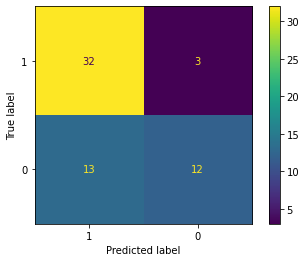

In [88]:

cm = confusion_matrix(y_test, y_pred_en3)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
print(cmd.plot())

## Plotting Decision Tree

[Text(0.4230769230769231, 0.875, 'X[11] <= 73.5\nentropy = 0.878\nsamples = 239\nvalue = [168, 71]'),
 Text(0.15384615384615385, 0.625, 'X[8] <= 133.5\nentropy = 0.65\nsamples = 60\nvalue = [10, 50]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.23076923076923078, 0.375, 'X[2] <= 109.5\nentropy = 0.755\nsamples = 46\nvalue = [10, 36]'),
 Text(0.15384615384615385, 0.125, 'entropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.581\nsamples = 36\nvalue = [5, 31]'),
 Text(0.6923076923076923, 0.625, 'X[7] <= 1.65\nentropy = 0.522\nsamples = 179\nvalue = [158, 21]'),
 Text(0.5384615384615384, 0.375, 'X[4] <= 27.5\nentropy = 0.296\nsamples = 153\nvalue = [145, 8]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.787\nsamples = 17\nvalue = [13, 4]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.191\nsamples = 136\nvalue = [132, 4]'),
 Text(0.8461538461538461, 0.375, 'X[4] <= 22.5\nentropy = 1.0\nsamples = 26\

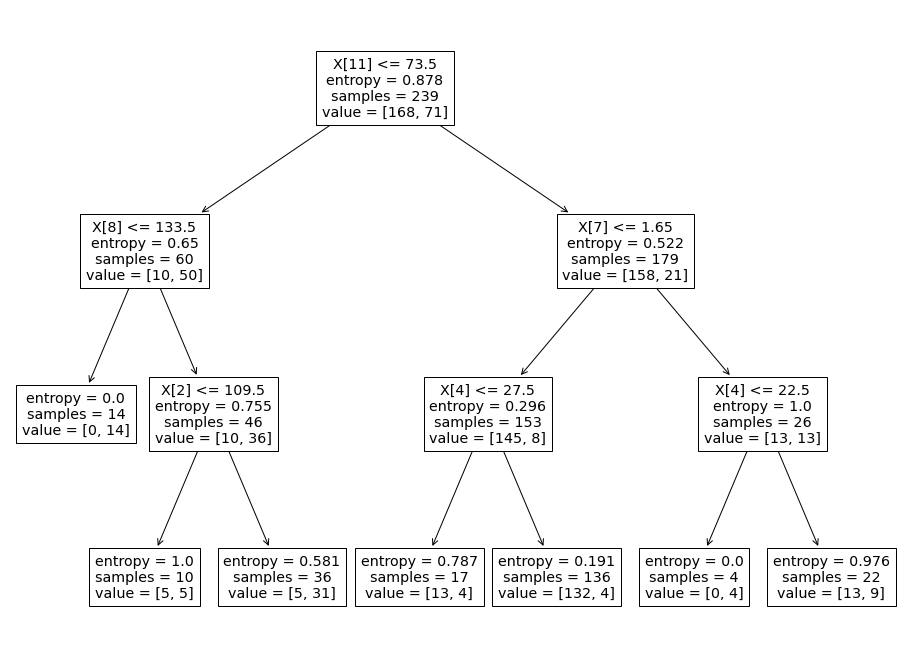

In [89]:
plt.figure(figsize=(16,12))
tree.plot_tree(dt_classifier3.fit(X_train, y_train)) 

# K Nearest Neighbour Classifier

### Checking best number of neighbours for K Nearest Neighbour Classifier

[0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.55, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.55, 0.55]


Text(0, 0.5, 'Accuracy of Testing')

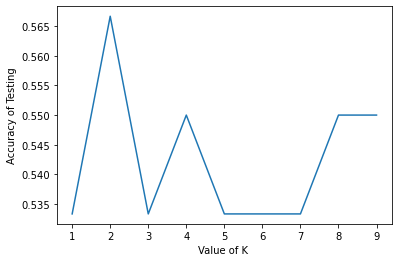

In [90]:
# Uncomment below line if you get following Error --- 'range' object is not callable ---
#del range

range = range(1, 10)
score = []
# looping through 1 - 10
for k in range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))
print(score)

# plot the relationship between K and testing accuracy

plt.plot(range, score)
plt.xlabel('Value of K ')
plt.ylabel('Accuracy of Testing')

- Ideal number of neighbours is 2.

### K Nearest Neighbour classifier with 2 neighbours

In [91]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
score = accuracy_score(y_test, y_pred_knn)



### Cnfusion Matrix

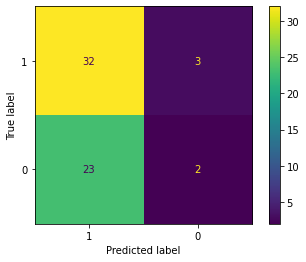

In [92]:

cm = confusion_matrix(y_test, y_pred_knn)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
print(cmd.plot())

In [93]:
acc_score = accuracy_score(y_test, y_pred_knn)*100
print('accuracy of model on the test dataset is : ', acc_score ) 

accuracy of model on the test dataset is :  56.666666666666664


In [94]:
print('accuracy of K Nearest Neighbour classifier is : ', acc_score) 
print('accuracy of Decision tree classifier is : ', DT_acc_score) 

accuracy of K Nearest Neighbour classifier is :  56.666666666666664
accuracy of Decision tree classifier is :  73.33333333333333


## Comparison and Result

Decision Tree Classifier performed better and has better accuracy. It is recommended to use Decision tree classifier for following dataset.